In [1]:
import numpy as np
import sys as system
from pandas import ExcelWriter

import pandas as pd
from pandas import Timestamp
import datetime
import matplotlib.pyplot as plt
import matplotlib as mlp

import umap

%matplotlib inline

In [2]:
xls = pd.ExcelFile(r"\Users\IST\Downloads\WorkingData.xlsx")
Block = pd.read_excel(xls, 'Block')
Tessellation = pd.read_excel(xls, 'Tessellation')

In [11]:
Block.iloc[:,:11]

,Rowid,OBJECTID,Metro,OfficeGFA,OfficeRent,Restaurant,RestaurantPrice,RetailGFA,Road,Starbucks,StarHotel
0,1,1,0.000000,0.000000,0.000000,0.000334,0.020911,0.000000,2.122233,0.000000,0.000000
1,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.179589,0.000000,0.000000
2,3,3,0.000000,0.000000,0.000000,0.002145,0.115539,0.000000,2.860221,0.000000,0.000000
3,4,4,0.000000,0.000000,0.000000,0.047318,2.827981,0.000000,3.010053,0.000000,0.000000
4,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.126616,0.000000,0.000000
5,6,6,0.000000,0.000000,0.000000,0.017525,0.874508,0.000000,3.102403,0.000000,0.000000
6,7,7,0.000000,0.000000,0.000000,0.065256,3.082259,0.000000,3.312862,0.000000,0.000000
7,8,8,0.000000,0.000000,0.000000,0.007460,0.295253,0.000000,3.502865,0.000000,0.000000
8,9,9,0.000000,0.000000,0.000000,0.039126,1.621085,0.000000,3.521152,0.000000,0.000000
9,10,10,0.000000,0.000000,0.000000,0.070240,3.046568,0.000000,3.521179,0.000000,0.000000


In [3]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaler.fit(Block.iloc[:,2:11])
X_scaled_array_Block = scaler.transform(Block.iloc[:,2:11])
X_scaled_Block = pd.DataFrame(X_scaled_array_Block, columns = Block.iloc[:,2:11].columns)

X_scaled_Block.sample(5)

scaler.fit(Tessellation.iloc[:,2:11])
X_scaled_array_Tessellation = scaler.transform(Tessellation.iloc[:,2:11])
X_scaled_Tessellation = pd.DataFrame(X_scaled_array_Tessellation, columns = Tessellation.iloc[:,2:11].columns)

X_scaled_Tessellation.sample(5)

,Metro,OfficeGFA,OfficeRent,Restaurant,RestaurantPrice,RetailGFA,Road,Starbucks,StarHotel
11826,-0.310885,-0.114508,-0.094559,-0.282858,-0.223937,-0.155769,-0.157464,-0.225661,-0.229930
5517,-0.310885,-0.114508,-0.094559,-0.282858,-0.223937,-0.155769,-1.674682,-0.225661,-0.229930
7659,-0.310885,-0.114508,-0.094559,-0.282858,-0.223937,-0.155769,-0.741504,-0.225661,-0.229930
5416,-0.310885,-0.114508,-0.094559,-0.282858,-0.223937,-0.155769,-0.207316,-0.225661,0.784631
7572,-0.310885,-0.114508,-0.094559,-0.282858,-0.223937,-0.155769,-0.222030,-0.225661,-0.229930


In [5]:
Class = []
for i in range(len(df['CBD_Submarkets'].tolist())):
    if df['CBD_Submarkets'].tolist()[i] == 'N':
        Class.append(0)
    else:
        Class.append(1)
        
    

    
list_of_tuples = list(zip(Class))
list_of_tuples
df_class = pd.DataFrame(list_of_tuples, columns = ['Class'])
df = pd.concat([df, df_class], axis=1)
df

,Rowid,OBJECTID,Metro,OfficeGFA,OfficeRent,Restaurant,RestaurantPrice,RetailGFA,Road,Starbucks,StarHotel,CBD_Submarkets,Class
0,1,1,0.000000,0.000000,0.000000,0.000334,0.020911,0.000000,2.122233,0.000000,0.000000,N,0
1,2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.179589,0.000000,0.000000,N,0
2,3,3,0.000000,0.000000,0.000000,0.002145,0.115539,0.000000,2.860221,0.000000,0.000000,N,0
3,4,4,0.000000,0.000000,0.000000,0.047318,2.827981,0.000000,3.010053,0.000000,0.000000,N,0
4,5,5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.126616,0.000000,0.000000,N,0
5,6,6,0.000000,0.000000,0.000000,0.017525,0.874508,0.000000,3.102403,0.000000,0.000000,N,0
6,7,7,0.000000,0.000000,0.000000,0.065256,3.082259,0.000000,3.312862,0.000000,0.000000,N,0
7,8,8,0.000000,0.000000,0.000000,0.007460,0.295253,0.000000,3.502865,0.000000,0.000000,N,0
8,9,9,0.000000,0.000000,0.000000,0.039126,1.621085,0.000000,3.521152,0.000000,0.000000,N,0
9,10,10,0.000000,0.000000,0.000000,0.070240,3.046568,0.000000,3.521179,0.000000,0.000000,N,0


In [12]:
X = df.iloc[:, :11]  # we only take the first two features.
Y = df['Class']
X
Y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3608    0
3609    0
3610    0
3611    0
3612    0
3613    0
3614    0
3615    0
3616    0
3617    0
3618    0
3619    0
3620    0
3621    1
3622    1
3623    0
3624    0
3625    0
3626    0
3627    0
3628    0
3629    0
3630    0
3631    0
3632    0
3633    0
3634    0
3635    0
3636    0
3637    1
Name: Class, Length: 3638, dtype: int64

TypeError: 'Series' objects are mutable, thus they cannot be hashed

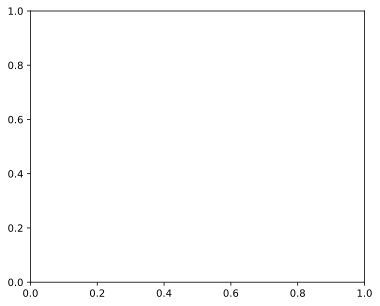

In [13]:
%config InlineBackend.figure_format = 'svg'
fig, axs = plt.subplots(1,1,figsize=(6,5),dpi=100)

def plot_data():
    class0 = (Y == 0)
    class1 = (Y == 1)
    

    plt.scatter(X[class0,0],X[class0,1], label="Decentralized",s=50,alpha=0.5)
    plt.scatter(X[class1,0],X[class1,1], label="CBD",    s=50,alpha=0.5);

    plt.xlabel("Sepal");
    plt.ylabel("Petal");
    plt.legend();

plot_data();


In [16]:
from sklearn.neighbors import KNeighborsClassifier
# from ml_utils import plot_knearest_classification

# train the model first
model = KNeighborsClassifier(n_neighbors=50,p=2)
model = model.fit(X,Y)

# predictions can now be done using
result = model.predict(X)


In [9]:
from sklearn.cluster import KMeans

nclusters = 2 # this is the k in kmeans
seed = 0

km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled_Block)

# predict the cluster for each data point
y_cluster_kmeans_Block = km.predict(X_scaled_Block)


km.fit(X_scaled_Tessellation)

# predict the cluster for each data point
y_cluster_kmeans_Tessellation = km.predict(X_scaled_Tessellation)



In [49]:
from sklearn import metrics
metrics.silhouette_score(X_scaled_Tessellation, AggloCluster_Tessellation)

0.9168190499626662

In [19]:
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")


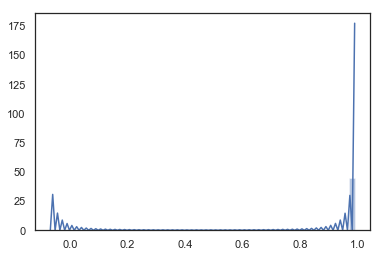

In [21]:
scores_Block = metrics.silhouette_samples(Block.iloc[:,2:11], y_cluster_kmeans_Block)
scores_Tessellation = metrics.silhouette_samples(Tessellation.iloc[:,2:11], y_cluster_kmeans_Tessellation)
sns.distplot(scores_Tessellation);

In [5]:
from sklearn.decomposition import PCA

ndimensions = 2

pca = PCA(n_components=ndimensions)
pca.fit(X_scaled_Block)
X_pca_array_Block = pca.transform(X_scaled_Block)
X_pca_Block = pd.DataFrame(X_pca_array_Block, columns=['PC1','PC2']) # PC=principal component

pca.fit(X_scaled_Tessellation)
X_pca_array_Tessellation = pca.transform(X_scaled_Tessellation)
X_pca_Tessellation = pd.DataFrame(X_pca_array_Tessellation, columns=['PC1','PC2']) # PC=principal component



In [6]:
from sklearn.manifold import TSNE

X_tsne_array_Block = TSNE(n_components=2).fit_transform(X_scaled_Block)
X_tsne_Block = pd.DataFrame(X_tsne_array_Block, columns=['tsne1','tsne2']) # PC=principal component

X_tsne_array_Tessellation = TSNE(n_components=2).fit_transform(X_scaled_Tessellation)
X_tsne_Tessellation = pd.DataFrame(X_tsne_array_Tessellation, columns=['tsne1','tsne2']) # PC=principal component


In [7]:
reducer = umap.UMAP()
embedding_Block = reducer.fit_transform(X_scaled_Block)
X_umap_Block = pd.DataFrame(embedding_Block, columns=['umap1','umap2']) # PC=principal component

embedding_Tessellation = reducer.fit_transform(X_scaled_Tessellation)
X_umap_Tessellation = pd.DataFrame(embedding_Tessellation, columns=['umap1','umap2']) # PC=principal component


In [34]:
Block_Kmeans = Block.copy()
Block_Kmeans['Class'] = y_cluster_kmeans_Block
Tessellation_Kmeans = Tessellation.copy()
Tessellation_Kmeans['Class'] = y_cluster_kmeans_Tessellation
Block_GMM = Block.copy()
Block_GMM['Class'] = y_cluster_gmm_Block
Tessellation_GMM = Tessellation.copy()
Tessellation_GMM['Class'] = y_cluster_gmm_Tessellation
Block_AggloCluster = Block.copy()
Block_AggloCluster['Class'] = AggloCluster_Block
Tessellation_AggloCluster = Tessellation.copy()
Tessellation_AggloCluster['Class'] = AggloCluster_Tessellation

In [35]:
def save_xls(list_dfs, xls_path, sheet_names):
    with ExcelWriter(xls_path) as writer:
        for n, df in enumerate(list_dfs):
            df.to_excel(writer, sheet_names[n], index = False)
        writer.save()

In [37]:
list_dfs_Kmeans = []
list_dfs_Kmeans.append(Block_Kmeans)
list_dfs_Kmeans.append(Tessellation_Kmeans)
list_dfs_GMM = []
list_dfs_GMM.append(Block_GMM)
list_dfs_GMM.append(Tessellation_GMM)
list_dfs_AggloCluster = []
list_dfs_AggloCluster.append(Block_AggloCluster)
list_dfs_AggloCluster.append(Tessellation_AggloCluster)

In [38]:
sheet_names = ['Block', 'Tessellation']

In [39]:
save_xls(list_dfs_Kmeans, r"\Users\IST\Downloads\WorkingData_Result_Kmeans.xlsx" , sheet_names )
save_xls(list_dfs_GMM, r"\Users\IST\Downloads\WorkingData_Result_GMM.xlsx" , sheet_names )
save_xls(list_dfs_AggloCluster, r"\Users\IST\Downloads\WorkingData_Result_AggloCluster.xlsx" , sheet_names )

In [13]:
Block_Kmeans_pca = X_pca_Block.copy()
Block_Kmeans_pca['Kmeans'] = y_cluster_kmeans_Block
Tessellation_Kmeans_pca = X_pca_Tessellation.copy()
Tessellation_Kmeans_pca['Kmeans'] = y_cluster_kmeans_Tessellation
Block_Kmeans_tsne = X_tsne_Block.copy()
Block_Kmeans_tsne['Kmeans'] = y_cluster_kmeans_Block
Tessellation_Kmeans_tsne = X_tsne_Tessellation.copy()
Tessellation_Kmeans_tsne['Kmeans'] = y_cluster_kmeans_Tessellation
Block_Kmeans_umap = X_umap_Block.copy()
Block_Kmeans_umap['Kmeans'] = y_cluster_kmeans_Block
Tessellation_Kmeans_umap = X_umap_Tessellation.copy()
Tessellation_Kmeans_umap['Kmeans'] = y_cluster_kmeans_Tessellation
Block_GMM_pca = X_pca_Block.copy()
Block_GMM_pca['GMM'] = y_cluster_gmm_Block
Tessellation_GMM_pca = X_pca_Tessellation.copy()
Tessellation_GMM_pca['GMM'] = y_cluster_gmm_Tessellation
Block_GMM_tsne = X_tsne_Block.copy()
Block_GMM_tsne['GMM'] = y_cluster_gmm_Block
Tessellation_GMM_tsne = X_tsne_Tessellation.copy()
Tessellation_GMM_tsne['GMM'] = y_cluster_gmm_Tessellation
Block_GMM_umap = X_umap_Block.copy()
Block_GMM_umap['GMM'] = y_cluster_gmm_Block
Tessellation_GMM_umap = X_umap_Tessellation.copy()
Tessellation_GMM_umap['GMM'] = y_cluster_gmm_Tessellation
Block_AggloCluster_pca = X_pca_Block.copy()
Block_AggloCluster_pca['AggloCluster'] = AggloCluster_Block
Tessellation_AggloCluster_pca = X_pca_Tessellation.copy()
Tessellation_AggloCluster_pca['AggloCluster'] = AggloCluster_Tessellation
Block_AggloCluster_tsne = X_tsne_Block.copy()
Block_AggloCluster_tsne['AggloCluster'] = AggloCluster_Block
Tessellation_AggloCluster_tsne = X_tsne_Tessellation.copy()
Tessellation_AggloCluster_tsne['AggloCluster'] = AggloCluster_Tessellation
Block_AggloCluster_umap = X_umap_Block.copy()
Block_AggloCluster_umap['AggloCluster'] = AggloCluster_Block
Tessellation_AggloCluster_umap = X_umap_Tessellation.copy()
Tessellation_AggloCluster_umap['AggloCluster'] = AggloCluster_Tessellation

In [14]:
def plotData_PCA(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mlp.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'PC1', y = 'PC2',
                     color = cmap(i/(2-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("PCA of CBD Data");

In [15]:
def plotDat_TSNE(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mlp.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'tsne1', y = 'tsne2',
                     color = cmap(i/(2-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("TSNE of CBD Data");

In [16]:
def plotData_UMAP(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mlp.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    # see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'umap1', y = 'umap2',
                     color = cmap(i/(2-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("UMAP of CBD Data");

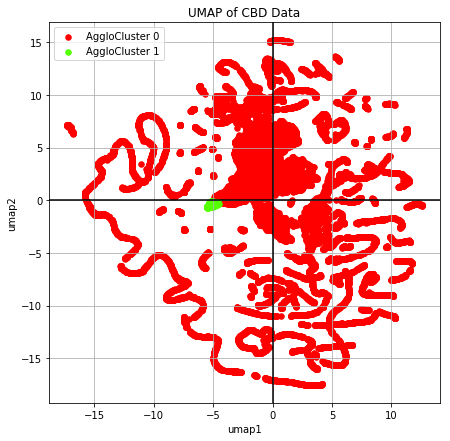

In [35]:
plotData_UMAP(Tessellation_AggloCluster_umap, 'AggloCluster')

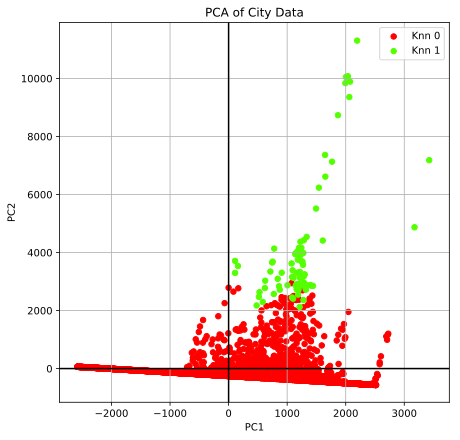

In [24]:
plotData(df_plot, 'Knn')

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
gm = GaussianMixture(n_components=2)
gm.fit(X_scaled_Block)


# predict the cluster for each data point
y_cluster_gmm_Block = gm.predict(X_scaled_Block)

gm.fit(X_scaled_Tessellation)
y_cluster_gmm_Tessellation = gm.predict(X_scaled_Tessellation)


In [25]:
df_plot['ClusterGMM'] = y_cluster_gmm
df_plot

,PC1,PC2,ClusterKmeans,ClusterGMM
0,-254.164070,64.820922,0,0
1,-254.164684,64.821565,0,0
2,-254.160795,64.817501,0,0
3,-254.077406,64.730238,0,0
4,-254.164211,64.821077,0,0
5,-254.137362,64.792979,0,0
6,-254.069442,64.721904,0,0
7,-254.154954,64.811392,0,0
8,-254.114219,64.768763,0,0
9,-254.070433,64.722942,0,0


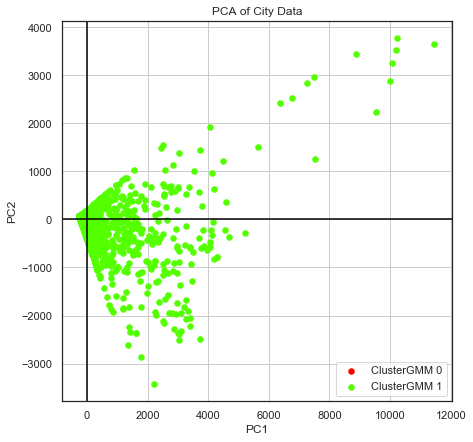

In [26]:
plotData(df_plot, 'ClusterGMM')

In [27]:
from sklearn.manifold import TSNE

In [28]:
X_tsne_array = TSNE(n_components=2).fit_transform(X_scaled)
X_tsne = pd.DataFrame(X_tsne_array, columns=['tsne1','tsne2']) # PC=principal component
X_tsne.sample(5)

,tsne1,tsne2
149,-67.235352,32.580429
191,-21.495947,35.881763
885,-24.952751,8.509855
2656,19.929451,-55.000988
802,7.611923,48.451408


In [29]:
df_plot_1 = X_tsne.copy()
df_plot_1['ClusterKmeans'] = y_cluster_kmeans
# df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot_1.sample(5)

,tsne1,tsne2,ClusterKmeans
2102,27.442408,-31.466505,0
3364,70.296326,-3.914093,0
1044,-12.425350,-5.004063,0
1904,3.244016,-32.778774,0
1946,34.656219,-18.173063,0


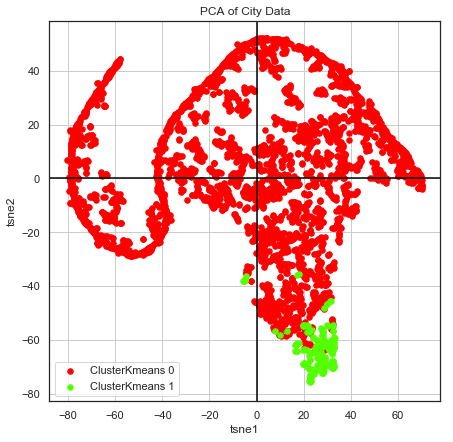

In [31]:
plotData(df_plot_1, 'ClusterKmeans')

In [32]:
df_plot_1['ClusterGMM'] = y_cluster_gmm
df_plot_1

,tsne1,tsne2,ClusterKmeans,ClusterGMM
0,-41.814392,7.586482,0,0
1,-39.561653,14.689254,0,0
2,11.699290,50.557648,0,0
3,23.276293,40.841362,0,0
4,33.332806,42.506054,0,0
5,31.421947,39.677898,0,0
6,37.247463,23.278255,0,0
7,44.475838,29.005598,0,0
8,44.936562,24.480103,0,0
9,42.836140,21.273312,0,0


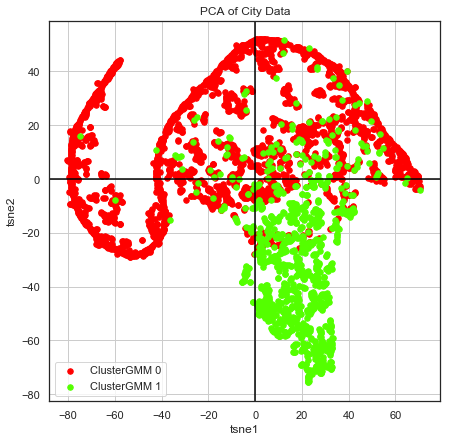

In [33]:
plotData(df_plot_1, 'ClusterGMM')

In [12]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
AggloCluster_Block = cluster.fit_predict(X_scaled_Block)

AggloCluster_Tessellation = cluster.fit_predict(X_scaled_Tessellation)

In [37]:
df_plot_1['AggloCluster'] = AggloCluster
df_plot_1

,tsne1,tsne2,ClusterKmeans,ClusterGMM,AggloCluster
0,-41.814392,7.586482,0,0,0
1,-39.561653,14.689254,0,0,0
2,11.699290,50.557648,0,0,0
3,23.276293,40.841362,0,0,0
4,33.332806,42.506054,0,0,0
5,31.421947,39.677898,0,0,0
6,37.247463,23.278255,0,0,0
7,44.475838,29.005598,0,0,0
8,44.936562,24.480103,0,0,0
9,42.836140,21.273312,0,0,0


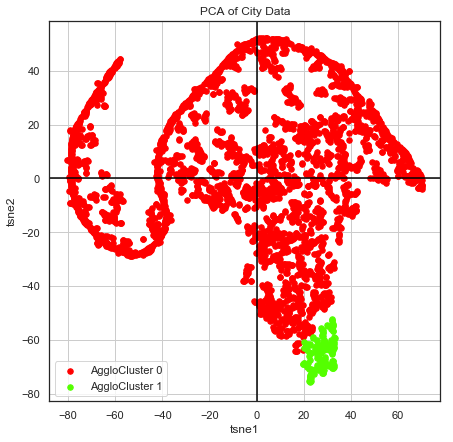

In [39]:
plotData(df_plot_1, 'AggloCluster')

In [40]:
reducer = umap.UMAP()

In [42]:
embedding = reducer.fit_transform(X_scaled)
X_umap = pd.DataFrame(embedding, columns=['umap1','umap2']) # PC=principal component
X_umap.sample(5)

,umap1,umap2
2663,0.387799,-1.979192
962,1.865423,4.718123
915,5.964338,1.081405
3098,-0.066973,0.690740
2721,-7.770928,5.268564


In [43]:
df_plot_2 = X_umap.copy()
df_plot_2['ClusterKmeans'] = y_cluster_kmeans
# df_plot['SpeciesId'] = y_id_array # also add actual labels so we can use it in later plots
df_plot_2.sample(5)

,umap1,umap2,ClusterKmeans
3562,-9.666224,4.775222,0
3509,0.344050,0.200107,0
2823,0.094659,-1.663099,0
1836,-1.162209,2.182582,0
3516,-1.805736,6.117959,0


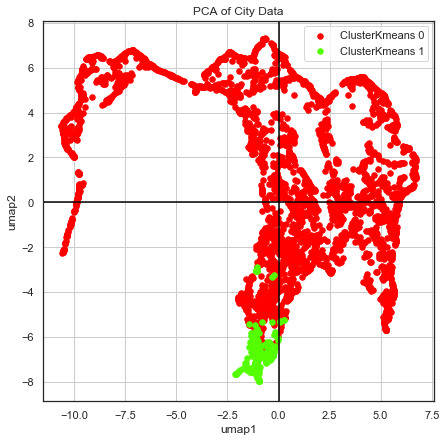

In [45]:
plotData(df_plot_2, 'ClusterKmeans')

In [46]:
df_plot_2['ClusterGMM'] = y_cluster_gmm
df_plot_2

,umap1,umap2,ClusterKmeans,ClusterGMM
0,-1.204301,6.579723,0,0
1,-0.273251,7.008712,0,0
2,5.779897,3.447722,0,0
3,5.131701,1.847905,0,0
4,6.731237,1.076665,0,0
5,6.116342,1.140911,0,0
6,4.747123,-0.134597,0,0
7,5.723310,-0.845973,0,0
8,5.402020,-1.059524,0,0
9,4.795821,-1.115600,0,0


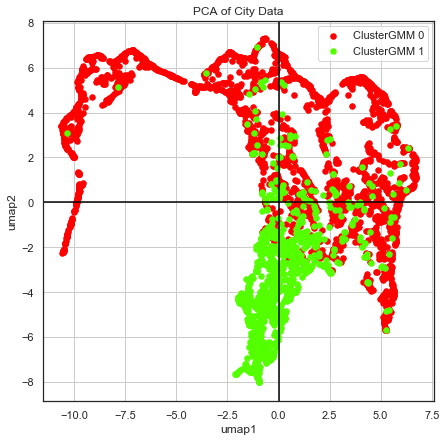

In [47]:
plotData(df_plot_2, 'ClusterGMM')

In [48]:
df_plot_2['AggloCluster'] = AggloCluster
df_plot_2

,umap1,umap2,ClusterKmeans,ClusterGMM,AggloCluster
0,-1.204301,6.579723,0,0,0
1,-0.273251,7.008712,0,0,0
2,5.779897,3.447722,0,0,0
3,5.131701,1.847905,0,0,0
4,6.731237,1.076665,0,0,0
5,6.116342,1.140911,0,0,0
6,4.747123,-0.134597,0,0,0
7,5.723310,-0.845973,0,0,0
8,5.402020,-1.059524,0,0,0
9,4.795821,-1.115600,0,0,0


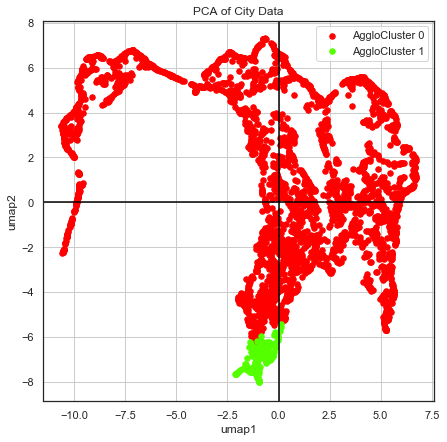

In [49]:
plotData(df_plot_2, 'AggloCluster')

In [50]:
df_plot['AggloCluster'] = AggloCluster
df_plot

,PC1,PC2,ClusterKmeans,ClusterGMM,AggloCluster
0,-254.164070,64.820922,0,0,0
1,-254.164684,64.821565,0,0,0
2,-254.160795,64.817501,0,0,0
3,-254.077406,64.730238,0,0,0
4,-254.164211,64.821077,0,0,0
5,-254.137362,64.792979,0,0,0
6,-254.069442,64.721904,0,0,0
7,-254.154954,64.811392,0,0,0
8,-254.114219,64.768763,0,0,0
9,-254.070433,64.722942,0,0,0


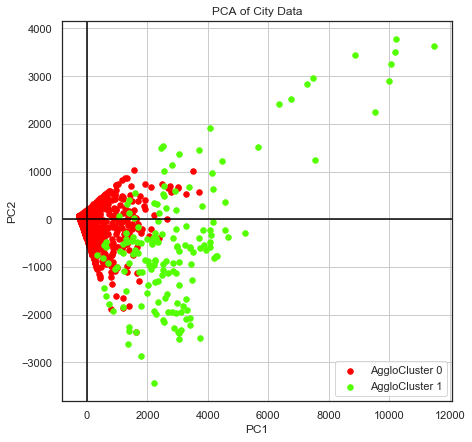

In [52]:
plotData(df_plot, 'AggloCluster')